In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor

In [2]:
# Downloading data from Yahoo Finance
data = yf.download('AMZN', start="1997-05-15", end="2021-07-08")

[*********************100%***********************]  1 of 1 completed


In [3]:
data.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
data['Date'] = data.index
data = data.reset_index(drop=True)
data = data[['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6076 entries, 0 to 6075
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       6076 non-null   datetime64[ns, UTC]
 1   Adj Close  6076 non-null   float64            
 2   Close      6076 non-null   float64            
 3   High       6076 non-null   float64            
 4   Low        6076 non-null   float64            
 5   Open       6076 non-null   float64            
 6   Volume     6076 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 332.4 KB


In [5]:
data.tail()

,Date,Adj Close,Close,High,Low,Open,Volume
6071,2021-06-30 00:00:00+00:00,172.007996,172.007996,173.580002,171.750000,172.052994,48080000
6072,2021-07-01 00:00:00+00:00,171.648499,171.648499,172.850006,170.470993,171.730499,40742000
6073,2021-07-02 00:00:00+00:00,175.548996,175.548996,175.585999,171.845993,172.582001,63388000
6074,2021-07-06 00:00:00+00:00,183.787003,183.787003,184.274002,176.449997,176.505493,134896000
6075,2021-07-07 00:00:00+00:00,184.828995,184.828995,186.710007,183.945496,185.869003,106562000


In [6]:
# Check for null values
any_null = data.isnull().values.any()
print(any_null)

False


In [7]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
# Sort values by ascending date
data = data.sort_values(by='Date')
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1997-05-15 00:00:00+00:00,0.097917,0.097917,0.125000,0.096354,0.121875,1443120000
1,1997-05-16 00:00:00+00:00,0.086458,0.086458,0.098958,0.085417,0.098438,294000000
2,1997-05-19 00:00:00+00:00,0.085417,0.085417,0.088542,0.081250,0.088021,122136000
3,1997-05-20 00:00:00+00:00,0.081771,0.081771,0.087500,0.081771,0.086458,109344000
4,1997-05-21 00:00:00+00:00,0.071354,0.071354,0.082292,0.068750,0.081771,377064000


In [9]:
# Extracting the Month
data['Month'] = data['Date'].dt.month

In [10]:
# Feature Engineering
data['Daily Return'] = data['Close'].pct_change() # fractional change between current and prior
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Month,Daily Return
0,1997-05-15 00:00:00+00:00,0.097917,0.097917,0.125000,0.096354,0.121875,1443120000,5,NaN
1,1997-05-16 00:00:00+00:00,0.086458,0.086458,0.098958,0.085417,0.098438,294000000,5,-0.117028
2,1997-05-19 00:00:00+00:00,0.085417,0.085417,0.088542,0.081250,0.088021,122136000,5,-0.012040
3,1997-05-20 00:00:00+00:00,0.081771,0.081771,0.087500,0.081771,0.086458,109344000,5,-0.042685
4,1997-05-21 00:00:00+00:00,0.071354,0.071354,0.082292,0.068750,0.081771,377064000,5,-0.127392


In [15]:
# Check for null values
any_null = data.isnull().values.any()
print(any_null)

if any_null == True:
  #remove the rows
  data = data.dropna()

False


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

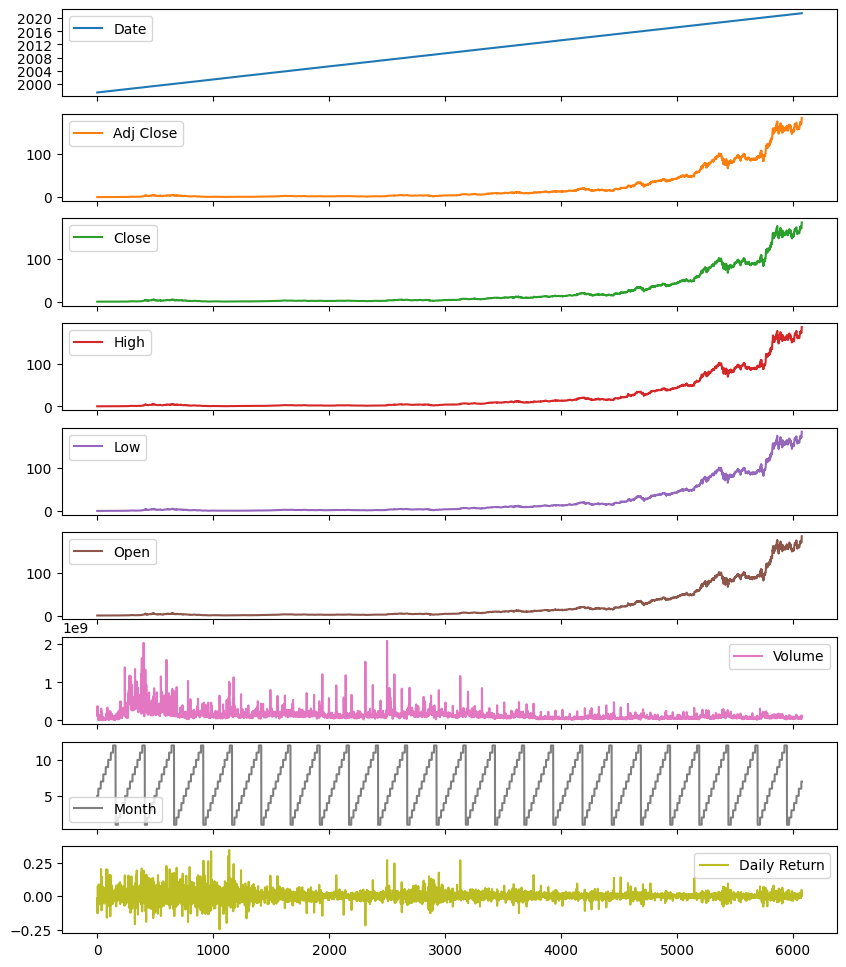

In [17]:
#Data Visualizations to get a better sense of the data
data.plot(subplots=True, figsize=(10,12))

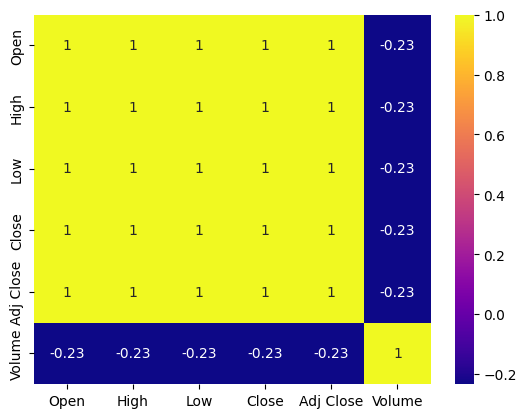

In [18]:
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')
plt.show()

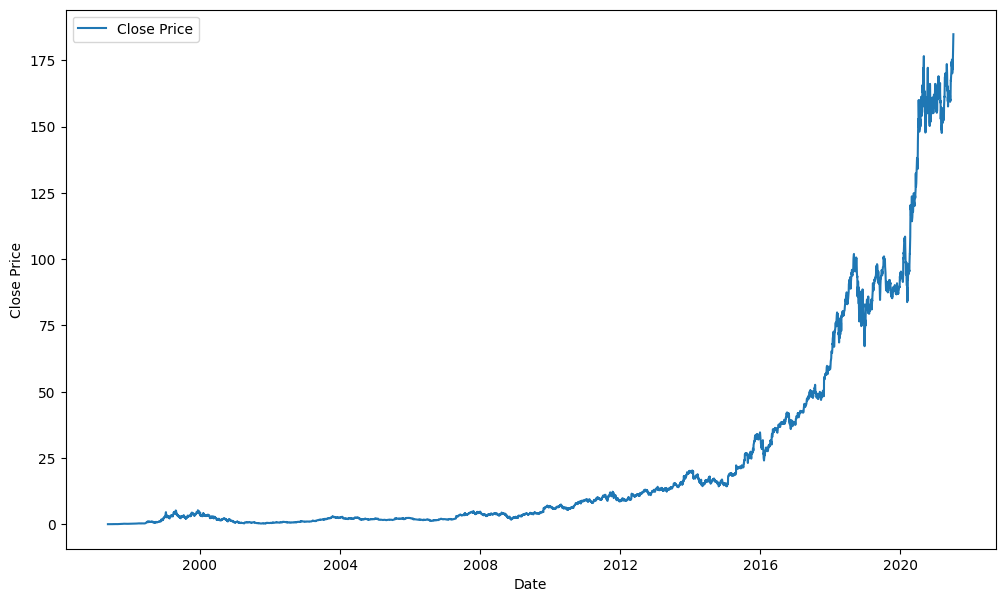

In [19]:
# Plot the closing price over time
plt.figure(figsize=(12, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

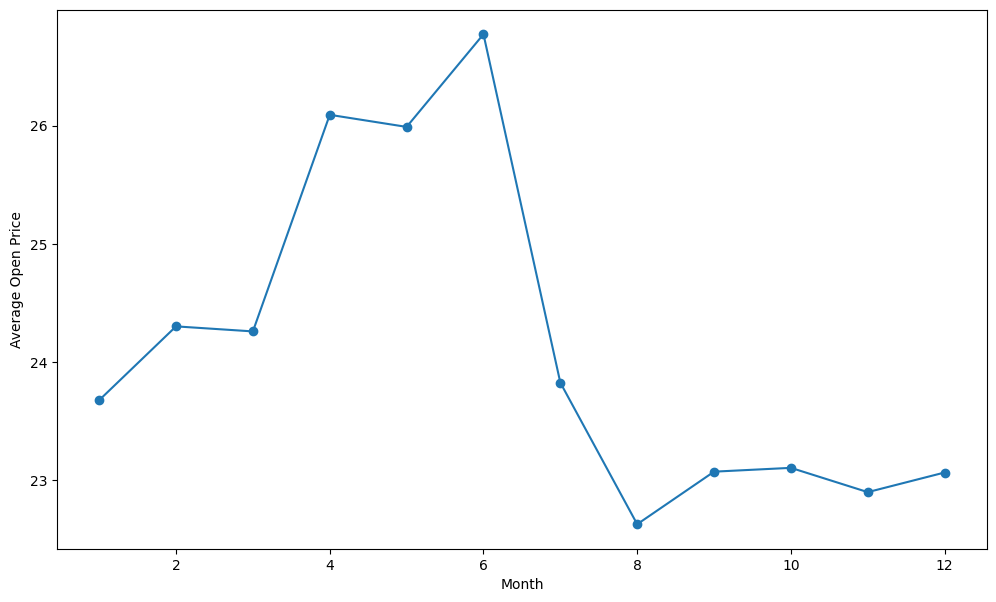

In [20]:
# Average open price per month
monthly_avg_open = data.groupby('Month')['Open'].mean()

plt.figure(figsize=(12, 7))
plt.plot(monthly_avg_open.index, monthly_avg_open.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Open Price')
plt.show()

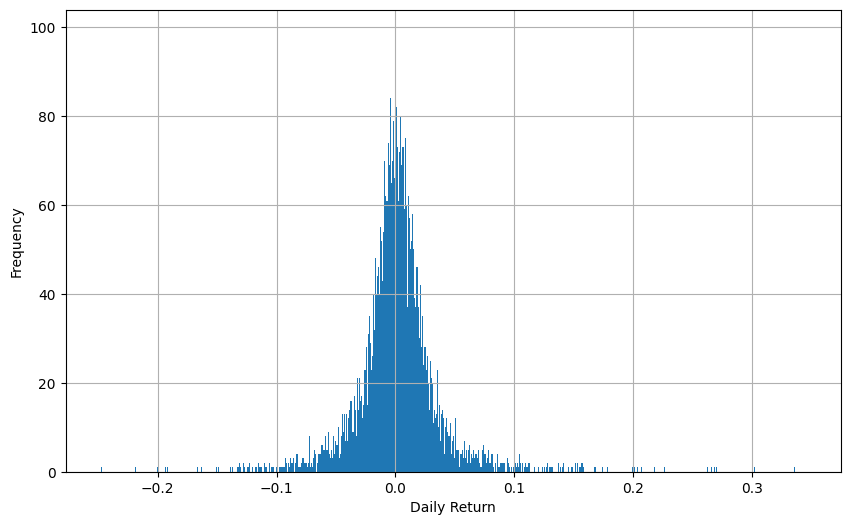

In [22]:
data['Daily Return'].hist(bins=1000, figsize=(10, 6))
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

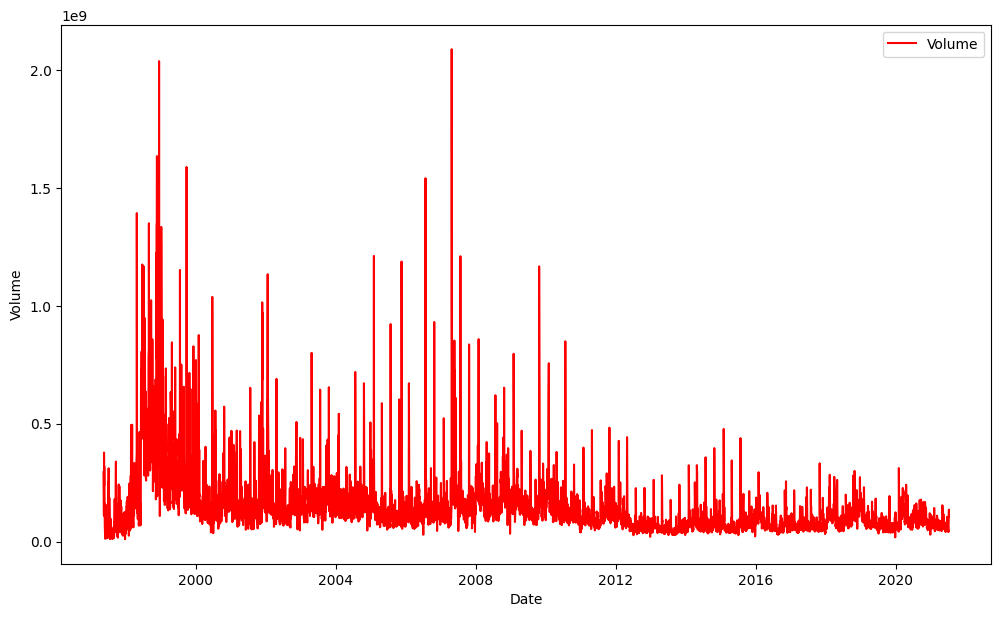

In [23]:
# Trading volume over time
plt.figure(figsize=(12, 7))
plt.plot(data['Date'], data['Volume'], label='Volume', color='red')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [25]:
# Initialize an empty list to store evaluation results
evaluation_results = []

In [26]:
feature_variables = ['Open', 'Daily Return']
target_variable = ['Close']

X = data[feature_variables]
Y = data[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [27]:
# Train LR Model
model= LinearRegression()
model.fit(X_train, y_train)

# LR Predictions
y_pred_train_lr = model.predict(X_train)
y_pred_test_lr = model.predict(X_test)

# LR Evaluation
rmse_train_lr = mean_squared_error(y_train, y_pred_train_lr, squared=False)
rmse_test_lr = mean_squared_error(y_test, y_pred_test_lr, squared=False)
r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)

evaluation_results.append(['Linear Regression', rmse_train_lr, rmse_test_lr, r2_train_lr, r2_test_lr])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
# Lasso / Ridge Model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter (regularization strength)
lasso_model.fit(X_train, y_train)

# Lasso Predictions
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Lasso Evaluation
train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

# Append Lasso results
evaluation_results.append(['Lasso', train_rmse_lasso, test_rmse_lasso, train_r2_lasso, test_r2_lasso])

In [30]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_model.fit(X_train, y_train)

# XGB Predictions
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# XGB Evaluation
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

# Append XGBoost results
evaluation_results.append(['XGBoost', train_rmse_xgb, test_rmse_xgb, train_r2_xgb, test_r2_xgb])

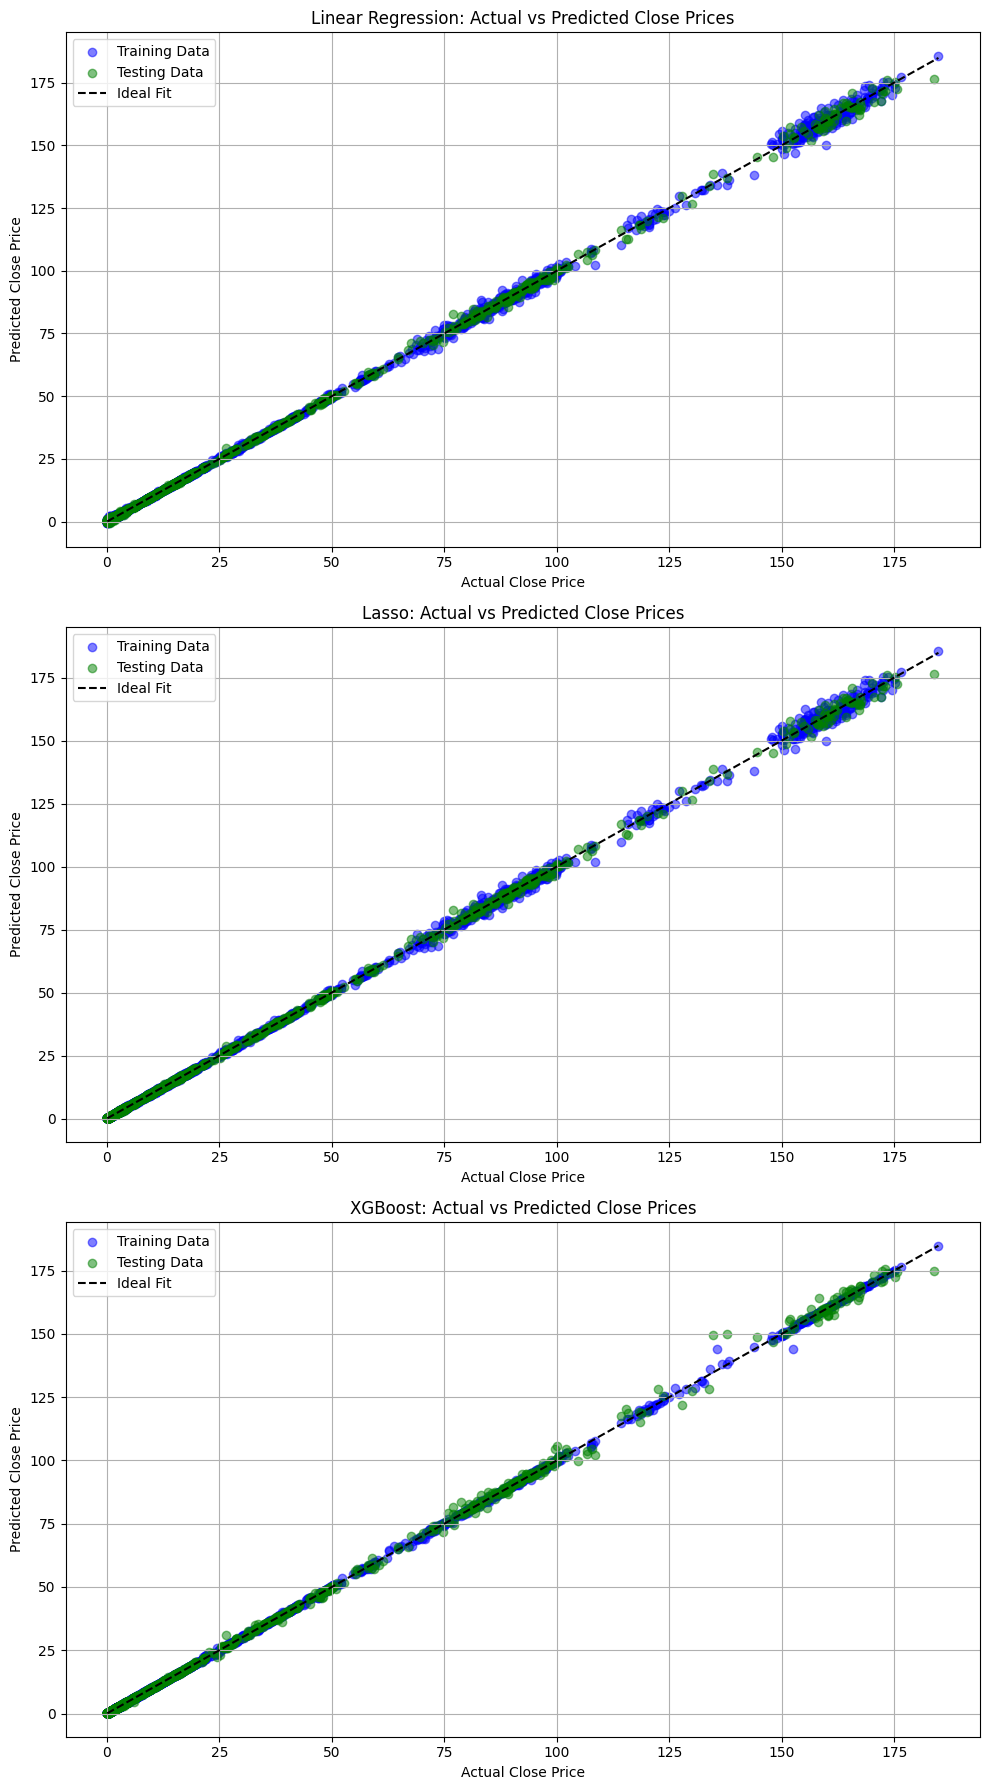

In [31]:
#Combined Plot of Actual vs Predicted
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Linear Regression Plot
axes[0].scatter(y_train, y_pred_train_lr, color='blue', alpha=0.5, label='Training Data')
axes[0].scatter(y_test, y_pred_test_lr, color='green', alpha=0.5, label='Testing Data')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='--', label='Ideal Fit')
axes[0].set_xlabel('Actual Close Price')
axes[0].set_ylabel('Predicted Close Price')
axes[0].set_title('Linear Regression: Actual vs Predicted Close Prices')
axes[0].legend()
axes[0].grid(True)

# Lasso Plot
axes[1].scatter(y_train, y_train_pred_lasso, color='blue', alpha=0.5, label='Training Data')
axes[1].scatter(y_test, y_test_pred_lasso, color='green', alpha=0.5, label='Testing Data')
axes[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='--', label='Ideal Fit')
axes[1].set_xlabel('Actual Close Price')
axes[1].set_ylabel('Predicted Close Price')
axes[1].set_title('Lasso: Actual vs Predicted Close Prices')
axes[1].legend()
axes[1].grid(True)

# XGBoost Plot
axes[2].scatter(y_train, y_train_pred_xgb, color='blue', alpha=0.5, label='Training Data')
axes[2].scatter(y_test, y_test_pred_xgb, color='green', alpha=0.5, label='Testing Data')
axes[2].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='--', label='Ideal Fit')
axes[2].set_xlabel('Actual Close Price')
axes[2].set_ylabel('Predicted Close Price')
axes[2].set_title('XGBoost: Actual vs Predicted Close Prices')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [32]:
# Create a DataFrame from the evaluation results
evaluation_df = pd.DataFrame(evaluation_results, columns=['Model', 'Train RMSE', 'Test RMSE', 'Train R²', 'Test R²'])
print(evaluation_df)

               Model  Train RMSE  Test RMSE  Train R²   Test R²
0  Linear Regression    0.712147   0.721241  0.999678  0.999677
1            XGBoost    0.299190   0.955352  0.999943  0.999433
2              Lasso    0.738470   0.736400  0.999653  0.999663
3            XGBoost    0.299190   0.955352  0.999943  0.999433
